In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
set1=pd.read_csv('/content/features_1st_test.csv')
set1.head()

,Unnamed: 0,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
0,2003-10-22 12:06:24,0.104144,0.081124,-0.029995,1.069717,4.803024,0.124614,0.720,1.108,5.777850,...,0.008295,1.808725,4.690568,0.115267,0.471,0.845,4.086150,0.089554,1.158290,4.732946
1,2003-10-22 12:09:13,0.103652,0.079517,-0.070080,1.162128,4.844823,0.123811,0.654,1.042,5.282236,...,-0.053796,1.873939,4.666130,0.109208,0.627,0.900,5.741343,0.083760,1.166940,6.699801
2,2003-10-22 12:14:13,0.105036,0.080219,-0.041649,0.986819,4.889290,0.125246,0.623,0.940,4.974196,...,0.047142,1.430337,4.681019,0.113696,0.601,0.977,5.286029,0.088438,1.156621,6.113934
3,2003-10-22 12:19:13,0.104898,0.080827,0.005162,1.034839,4.852678,0.125197,0.598,1.055,4.776455,...,0.021107,1.378814,4.696176,0.114413,0.525,0.852,4.588643,0.088513,1.160374,5.324541
4,2003-10-22 12:24:13,0.104776,0.082036,-0.060200,1.110728,4.889980,0.125618,0.623,1.011,4.959475,...,0.008627,1.498312,4.693567,0.114258,0.522,0.871,4.568625,0.088453,1.160349,5.301201


In [ ]:
set1 = set1.rename(columns={'Unnamed: 0':'time'})
#set1 = set1.set_index('time')
last_cycle = int(len(set1))

In [ ]:
set1.head()

,time,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
0,2003-10-22 12:06:24,0.104144,0.081124,-0.029995,1.069717,4.803024,0.124614,0.720,1.108,5.777850,...,0.008295,1.808725,4.690568,0.115267,0.471,0.845,4.086150,0.089554,1.158290,4.732946
1,2003-10-22 12:09:13,0.103652,0.079517,-0.070080,1.162128,4.844823,0.123811,0.654,1.042,5.282236,...,-0.053796,1.873939,4.666130,0.109208,0.627,0.900,5.741343,0.083760,1.166940,6.699801
2,2003-10-22 12:14:13,0.105036,0.080219,-0.041649,0.986819,4.889290,0.125246,0.623,0.940,4.974196,...,0.047142,1.430337,4.681019,0.113696,0.601,0.977,5.286029,0.088438,1.156621,6.113934
3,2003-10-22 12:19:13,0.104898,0.080827,0.005162,1.034839,4.852678,0.125197,0.598,1.055,4.776455,...,0.021107,1.378814,4.696176,0.114413,0.525,0.852,4.588643,0.088513,1.160374,5.324541
4,2003-10-22 12:24:13,0.104776,0.082036,-0.060200,1.110728,4.889980,0.125618,0.623,1.011,4.959475,...,0.008627,1.498312,4.693567,0.114258,0.522,0.871,4.568625,0.088453,1.160349,5.301201


In [ ]:
features = set1.copy()

In [ ]:
#simple moving average SMA
ma = pd.DataFrame()
ma['B4_x_mean'] = features['B4_x_mean']
ma['SMA'] = ma['B4_x_mean'].rolling(window=5).mean()
ma['time'] = features['time']
#Cumulative Moving Average
ma['CMA'] = ma["B4_x_mean"].expanding(min_periods=10).mean()
#Exponantial Moving Average
ma['EMA'] = ma['B4_x_mean'].ewm(span=40,adjust=False).mean()

<Axes: xlabel='time'>

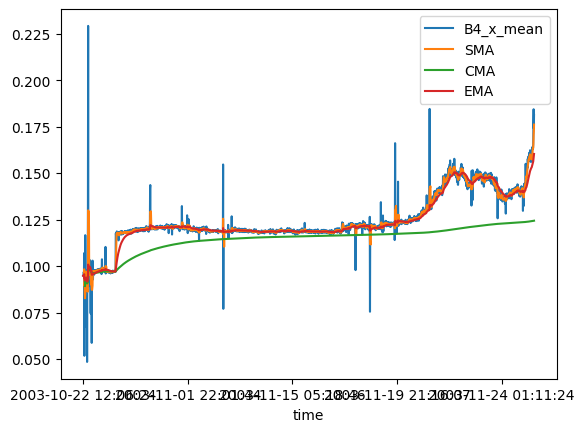

In [ ]:
ma.plot(x="time", y= ['B4_x_mean','SMA','CMA','EMA'])

In [ ]:
def health_indicator(bearing_data,use_filter=False):
    data = bearing_data.copy()
    if use_filter:
        for ft in data.columns:
            data[ft] = data[ft].ewm(span=40,adjust=False).mean()
    pca = PCA()
    X_pca = pca.fit_transform(data)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    print("Pourcentage de variance expliquée par PC1:"+str(pca.explained_variance_ratio_[0]))
    health_indicator = np.array(X_pca['PC1'])
    degredation = pd.DataFrame(health_indicator,columns=['PC1'])
    degredation['cycle'] = degredation.index
    degredation['PC1'] = degredation['PC1']-degredation['PC1'].min(axis=0)

    return degredation

def fit_exp(df,base=500,print_parameters=False):
    x =np.array(df.cycle)
    x = x[-base:].copy()
    y = np.array(degredation.PC1)
    y = y[-base:].copy()
    def exp_fit(x,a,b):
        y = a*np.exp(abs(b)*x)
        return y
    #initial parameters affect the result
    fit = curve_fit(exp_fit,x,y,p0=[0.01,0.001],maxfev=10000)
    if print_parameters:
        print(fit)
    return fit

def predict(X_df,p):
    x =np.array(X_df.cycle)
    a,b = p[0]
    fit_eq = a*np.exp(abs(b)*x)
    return fit_eq
log = [[],[]]

In [ ]:
#variable for incrementing index
init_cycle = 600
#variable for keeping intial value
prediction_cycle = init_cycle

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

In [ ]:
selected_features = ['max','p2p','rms']

bearing = 3
B_x = ["B{}_x_".format(bearing)+i for i in selected_features]
early_cycles = set1[B_x][:init_cycle]
early_cycles_pca = health_indicator(early_cycles,use_filter=True)

Pourcentage de variance expliquée par PC1:0.9955861966921857


In [ ]:
early_cycles_pca.head()

,PC1,cycle
0,0.000000,0
1,0.008467,1
2,0.014581,2
3,0.014515,3
4,0.018767,4


Pourcentage de variance expliquée par PC1:0.999064727177232
0.3021190490330367 0.0011002271962359913
failed at1717.9009246585542


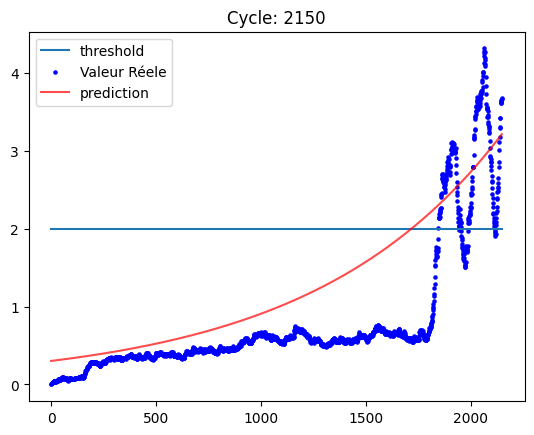

In [ ]:
#run this again, again to simulate life-cycle of a bearing
data = set1[B_x][:prediction_cycle]
ind=data.index
degredation = health_indicator(data,use_filter=True)
#degredation.plot(y='PC1',x='cycle')
fit = fit_exp(degredation,base=250)

prediction = predict(degredation,fit)
m,n = fit[0]
thres = 2
#print(prediction_cycle)
fail_cycle = (np.log(thres/m))/abs(n)
log[0].append(prediction_cycle)
log[1].append(fail_cycle)

print(m,n)
print('failed at'+str(fail_cycle))

fig =plt.figure('Cycle: '+str(prediction_cycle))
ax =fig.subplots()

ax.plot([0,prediction_cycle],[2,2],label='threshold')
ax.scatter(degredation['cycle'],degredation['PC1'],color='b',s=5,label='Valeur Réele')
ax.plot(degredation['cycle'],prediction,color='r',alpha=0.7,label='prediction')
ax.set_title('Cycle: '+str(prediction_cycle))
plt.legend()
fig.savefig('output.png')
plt.show()
increment_cycle =25
prediction_cycle += increment_cycle

In [ ]:
len(log[0])

63

In [ ]:
#True labels represent Warnings!
d = {'time':set1['time'][init_cycle::increment_cycle],'cycle': log[0], 'prediction': (np.array(log[1]))}
df = pd.DataFrame(d)
df['isvalid'] = df['prediction']<2156
#adding real labels for analysing results
df['real'] = np.zeros(len(set1['time'][init_cycle::increment_cycle]))

for row in set1['time'][init_cycle::increment_cycle].index:
    if bearing == 1:
        if row<=151:
            df['real'][row] = 'early'
        if 151 < row <=600:
            df['real'][row] = "suspect"
        if 600 < row <=1499:
            df['real'][row] = "normal"
        if 1499 < row <=2098:
            df['real'][row] = "suspect"
        if 2098 < row <= 2156:
            df['real'][row] =("imminent_failure")
    if bearing == 2:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <=2000:
            df['real'][row] =("normal")
        if 2000 < row <=2120:
            df['real'][row] =("suspect")
        if 2120< row <=2156:
            df['real'][row] =("imminet_failure")

    if bearing == 3:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <= 1790:
            df['real'][row] =("normal")
        if 1790 < row <=2120:
            df['real'][row] =("suspect")
        if 2120 < row <=2156:
            df['real'][row] =("Inner_race_failure")
    if bearing == 4:
        if row<=200:
            df['real'][row] =("early")
        if 200 < row <=1000:
            df['real'][row] =("normal")
        if 1000 < row <= 1435:
            df['real'][row] =("suspect")
        if 1435 < row <=1840:
            df['real'][row] =("Inner_race_failure")
        if 1840 < row <=2156:
            df['real'][row] =("Stage_two_failure")

print(bearing)
print(df.tail(60))


3
                     time  cycle    prediction  isvalid                real
675   2003-11-09 00:51:44    675  5.363976e+03    False              normal
700   2003-11-09 05:01:44    700  3.656990e+03    False              normal
725   2003-11-09 09:05:58    725  2.781643e+03    False              normal
750   2003-11-09 13:15:58    750  3.198957e+03    False              normal
775   2003-11-09 17:25:58    775  2.489782e+03    False              normal
800   2003-11-10 01:05:58    800  2.805884e+03    False              normal
825   2003-11-10 05:15:58    825  2.582745e+03    False              normal
850   2003-11-10 09:25:58    850  2.704311e+03    False              normal
875   2003-11-10 13:35:58    875  3.373483e+03    False              normal
900   2003-11-14 12:12:17    900  4.313105e+03    False              normal
925   2003-11-14 16:22:17    925  2.884454e+03    False              normal
950   2003-11-14 20:58:46    950  2.099234e+03     True              normal
975   2003

<ipython-input-82-c2912144f246>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['real'][row] =("normal")
<ipython-input-82-c2912144f246>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
df.head()

,time,cycle,prediction,isvalid,real
600,2003-11-08 12:21:44,600,4151.198591,False,normal
625,2003-11-08 16:31:44,625,7085.256055,False,normal
650,2003-11-08 20:41:44,650,7128.940692,False,normal
675,2003-11-09 00:51:44,675,5363.976069,False,normal
700,2003-11-09 05:01:44,700,3656.989984,False,normal


In [ ]:
#Installation du module arch:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 21.1 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import layers,models,Sequential
from statsmodels.tsa.stattools import adfuller,kpss
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [ ]:
degredation_0=health_indicator(set1[B_x],use_filter=True)

Pourcentage de variance expliquée par PC1:0.9988910022266081


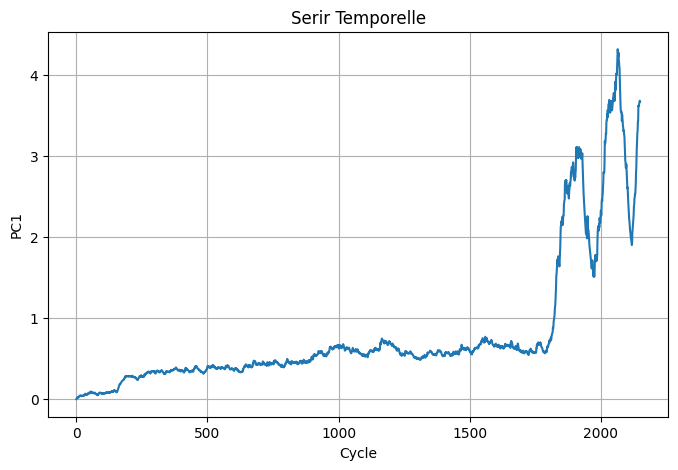

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(degredation['cycle'],degredation['PC1'])
plt.title('Serir Temporelle')
plt.xlabel('Cycle')
plt.ylabel('PC1')
plt.grid(True)
plt.show()

# Aproche Statistique

In [ ]:
#Test du Dickey-Fuller augmenter:
def test_ADF(serie):
  resultat=adfuller(serie)
  print("\n🔹 Test de Dickey-Fuller Augmenté (ADF)")
  print(f"- ADF statistic :{resultat[0]}")
  print(f"- P-value :{resultat[1]}")
  print(f"- Valeurs critiques :{resultat[4]}")
  if resultat[1]>0.05:
    print("❌ La série est non stationnaire : possible marche aléatoire.")
  else:
    print("✅ La série est stationnaire : pas une marche aléatoire.")
#Test de Phillips-Perron:
def test_PP(serie):
  PP_test=PhillipsPerron(serie)
  print("\n🔹 Test de Phillips-Perron (PP)")
  print(PP_test.summary)
  if PP_test.pvalue>0.05:
    print("❌ La série est non stationnaire : possible marche aléatoire.")
  else:
    print("✅ La série est stationnaire : pas une marche aléatoire.")
#Test de KPSS:
def test_KPSS(serie):
    kpss_test = kpss(serie, regression="c", nlags="auto")  # "c" pour une tendance constante
    print("\n🔹 Test de KPSS (Kwiatkowski-Phillips-Schmidt-Shin)")
    print(f"Statistique de test : {kpss_test[0]:.4f}")
    print(f"p-value : {kpss_test[1]:.4f}")

    if kpss_test[1] > 0.05:
        print("✅ La série est stationnaire.")
    else:
        print("❌ La série est non stationnaire.")

In [ ]:
#Les tests de stationarite:
test_ADF(degredation_0['PC1'])


🔹 Test de Dickey-Fuller Augmenté (ADF)
- ADF statistic :0.47967985317614736
- P-value :0.9842422189987702
- Valeurs critiques :{'1%': np.float64(-3.4334252475234646), '5%': np.float64(-2.8628985239834686), '10%': np.float64(-2.567493212493555)}
❌ La série est non stationnaire : possible marche aléatoire.


In [ ]:
test_PP(degredation_0['PC1'])


🔹 Test de Phillips-Perron (PP)
<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.PhillipsPerron'>
"""
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.868
P-value                         0.993
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
❌ La série est non stationnaire : possible marche aléatoire.


In [ ]:
test_KPSS(degredation_0['PC1'])


🔹 Test de KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
Statistique de test : 4.0285
p-value : 0.0100
❌ La série est non stationnaire.


<ipython-input-88-bc61e9c6229c>:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(serie, regression="c", nlags="auto")  # "c" pour une tendance constante


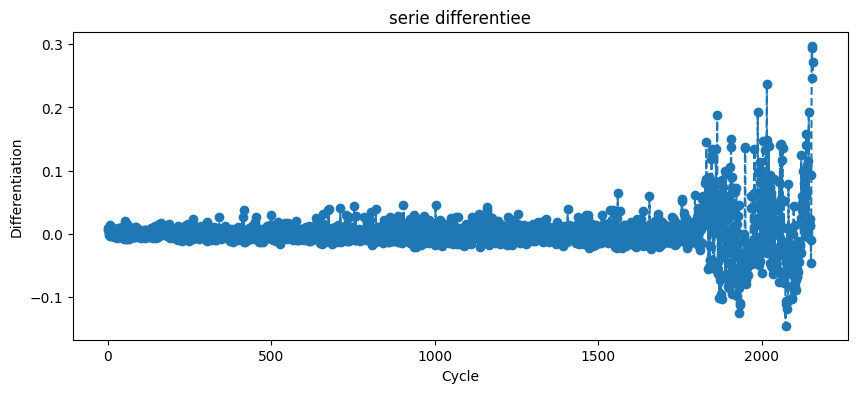

In [ ]:
degredation_1=degredation_0['PC1'].diff().dropna()
plt.figure(figsize=(10,4))
plt.plot(degredation_1,marker='o',linestyle='--')
plt.title('serie differentiee')
plt.xlabel('Cycle')
plt.ylabel('Differentiation')
plt.show()

In [ ]:
#Les tests de stationarite sur la serie diff:
test_ADF(degredation_1)


🔹 Test de Dickey-Fuller Augmenté (ADF)
- ADF statistic :-3.011440892088632
- P-value :0.03383969072354263
- Valeurs critiques :{'1%': np.float64(-3.4334252475234646), '5%': np.float64(-2.8628985239834686), '10%': np.float64(-2.567493212493555)}
✅ La série est stationnaire : pas une marche aléatoire.


In [ ]:
test_PP(degredation_1)


🔹 Test de Phillips-Perron (PP)
<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.PhillipsPerron'>
"""
     Phillips-Perron Test (Z-tau)    
Test Statistic                -43.334
P-value                         0.000
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
✅ La série est stationnaire : pas une marche aléatoire.


In [ ]:
test_KPSS(degredation_1)


🔹 Test de KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
Statistique de test : 0.3521
p-value : 0.0978
✅ La série est stationnaire.


<Figure size 1500x800 with 0 Axes>

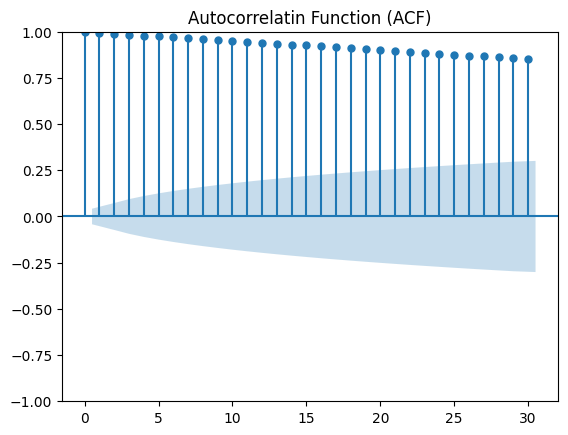

<Figure size 1500x800 with 0 Axes>

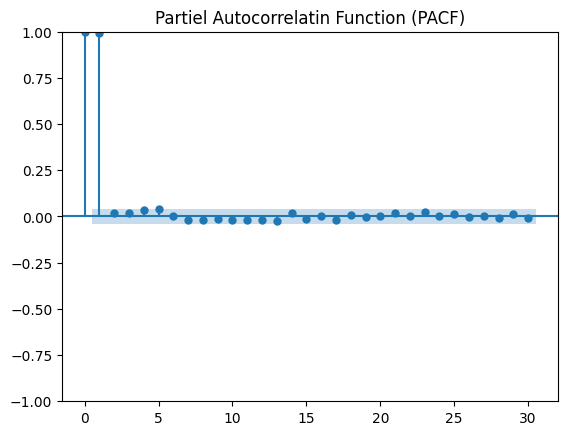

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Definir la fonction qui permet le trassage du (ACF) et du (PACF):
def acf(serie,lags=30):
  plt.figure(figsize=(15,8))
  #Tracer le ACF:
  plot_acf(serie,lags=lags)
  plt.title('Autocorrelatin Function (ACF)')
  plt.show()
def pacf(serie,lags=30):
  plt.figure(figsize=(15,8))
  #Tracer le PACF:
  plot_pacf(serie,lags=lags)
  plt.title('Partiel Autocorrelatin Function (PACF)')
  plt.show()
#Le trassage du (ACF) et (PACF) pour la difference du dataset:
acf(degredation_0['PC1'])
pacf(degredation_0['PC1'])

<Figure size 1500x800 with 0 Axes>

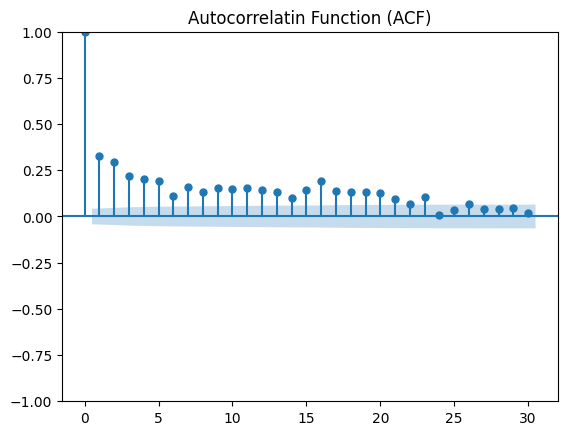

<Figure size 1500x800 with 0 Axes>

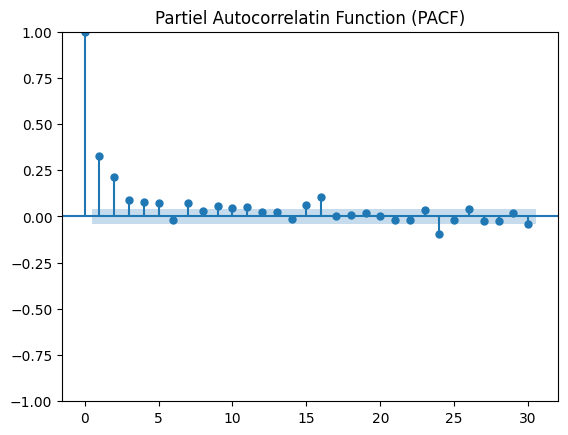

In [ ]:
acf(degredation_1)
pacf(degredation_1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
degredation_1_train=degredation_1[:1950]
degredation_1_test=degredation_1[1950:]

In [ ]:
#Remplacez p,d,q :
p = 2
d = 0
q = 2

model =ARIMA(degredation_1_train,order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

                               SARIMAX Results                                
Dep. Variable:                    PC1   No. Observations:                 1950
Model:                 ARIMA(2, 0, 2)   Log Likelihood                4899.757
Date:                Sat, 10 May 2025   AIC                          -9787.515
Time:                        23:36:00   BIC                          -9754.061
Sample:                             0   HQIC                         -9775.216
                               - 1950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.478      0.139      -0.000       0.003
ar.L1          1.3270      0.045     29.276      0.000       1.238       1.416
ar.L2         -0.5203      0.040    -12.901      0.0

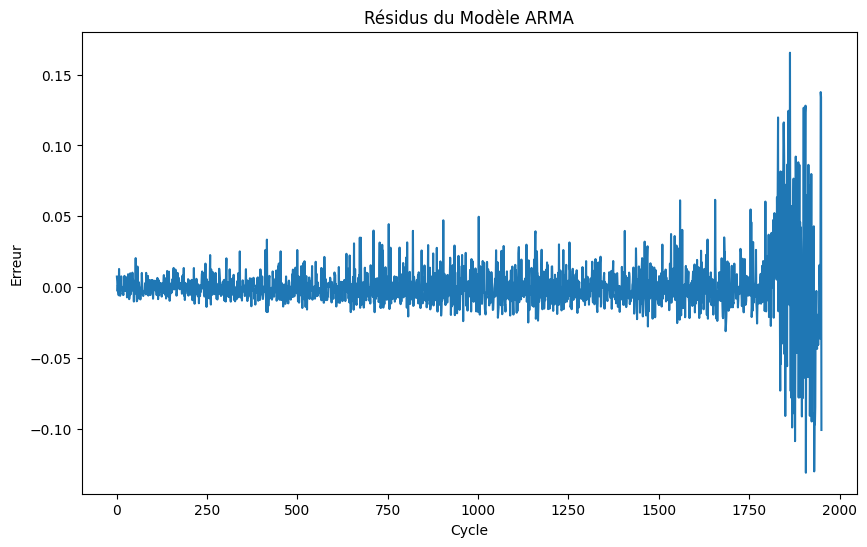

<Figure size 1000x600 with 0 Axes>

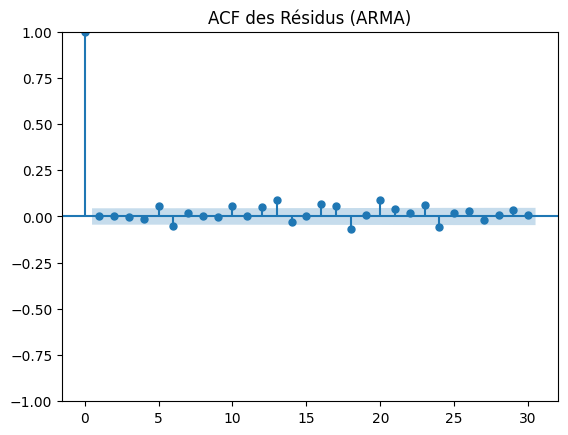

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Résidus du Modèle ARMA')
plt.xlabel('Cycle')
plt.ylabel('Erreur')
plt.show()
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30)
plt.title('ACF des Résidus (ARMA)')
plt.show()

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10])
print('Test de Ljung-Box :', lb_test)

Test de Ljung-Box :       lb_stat  lb_pvalue
10  19.222832   0.037522


In [ ]:
prediction_diff = model_fit.predict(start=len(degredation_1_train), end=len(degredation_1)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# Évaluation du modèle
mse = mean_squared_error(degredation_1_test, prediction_diff)
print(f'Mean Squared Error sur l\'ensemble de test : {mse:.4f}')

Mean Squared Error sur l'ensemble de test : 0.0058


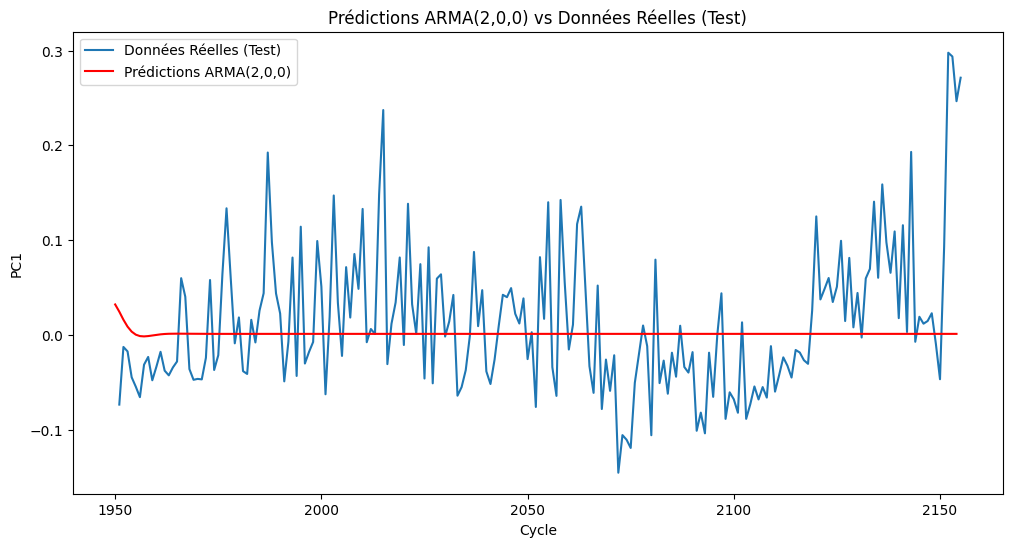

In [ ]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(degredation_1_test, label='Données Réelles (Test)')
plt.plot(prediction_diff, color='red', label='Prédictions ARMA(2,0,0)')
plt.title('Prédictions ARMA(2,0,0) vs Données Réelles (Test)')
plt.xlabel('Cycle')
plt.ylabel('PC1')
plt.legend()
plt.show()

In [ ]:
degredation_0_train = degredation_0[:1950]['PC1']
degredation_0_test = degredation_0[1950:-1]['PC1']

In [ ]:
prediction_original = np.zeros(len(prediction_diff))

In [ ]:
last_original_value = degredation_0_train.iloc[-1]
# Inversion de la différenciation (avec différenciation d'ordre 1)
prediction_original[0] = last_original_value + prediction_diff.iloc[0]
for i in range(1, len(prediction_diff)):
    prediction_original[i] = prediction_original[i-1] + prediction_diff.iloc[i]

In [ ]:
# ----- ÉVALUATION DES PRÉDICTIONS ORIGINALES -----
mse = mean_squared_error(degredation_0_test, prediction_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(degredation_0_test, prediction_original)
r2 = r2_score(degredation_0_test, prediction_original)

In [ ]:
print(f'Évaluation des prédictions (échelle originale) :')
print(f'MSE : {mse:.6f}')
print(f'RMSE : {rmse:.6f}')
print(f'MAE : {mae:.6f}')
print(f'R² : {r2:.6f}')

Évaluation des prédictions (échelle originale) :
MSE : 0.801437
RMSE : 0.895230
MAE : 0.753982
R² : -0.201210


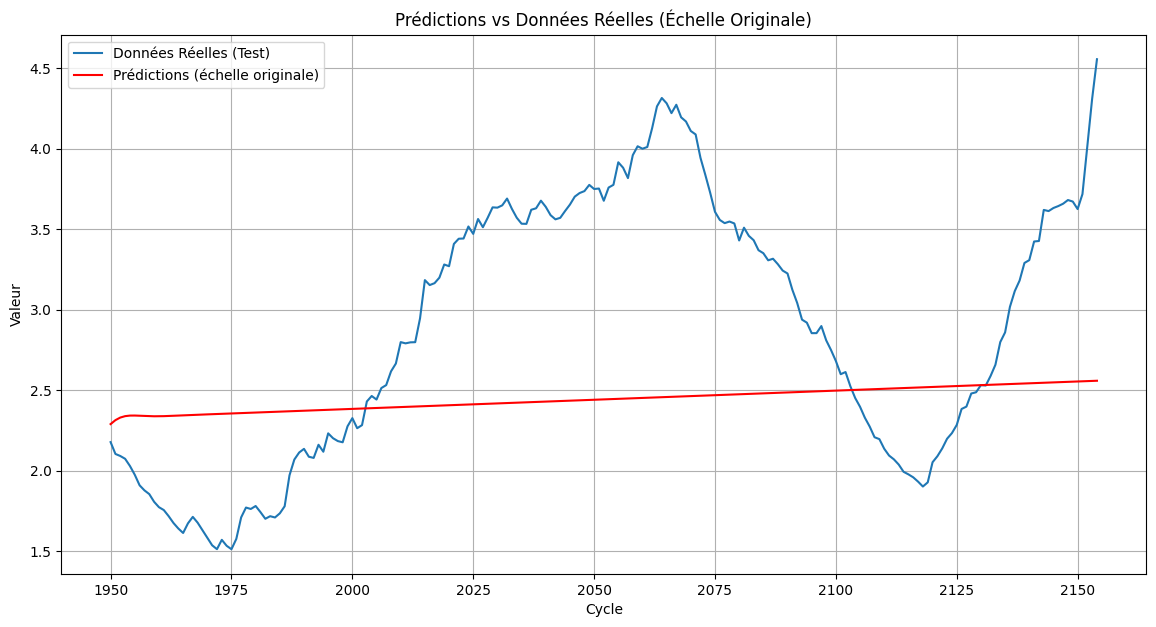

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(degredation_0_test.index, degredation_0_test, label='Données Réelles (Test)')
plt.plot(degredation_0_test.index, prediction_original, color='red', label='Prédictions (échelle originale)')
plt.title('Prédictions vs Données Réelles (Échelle Originale)')
plt.xlabel('Cycle')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()


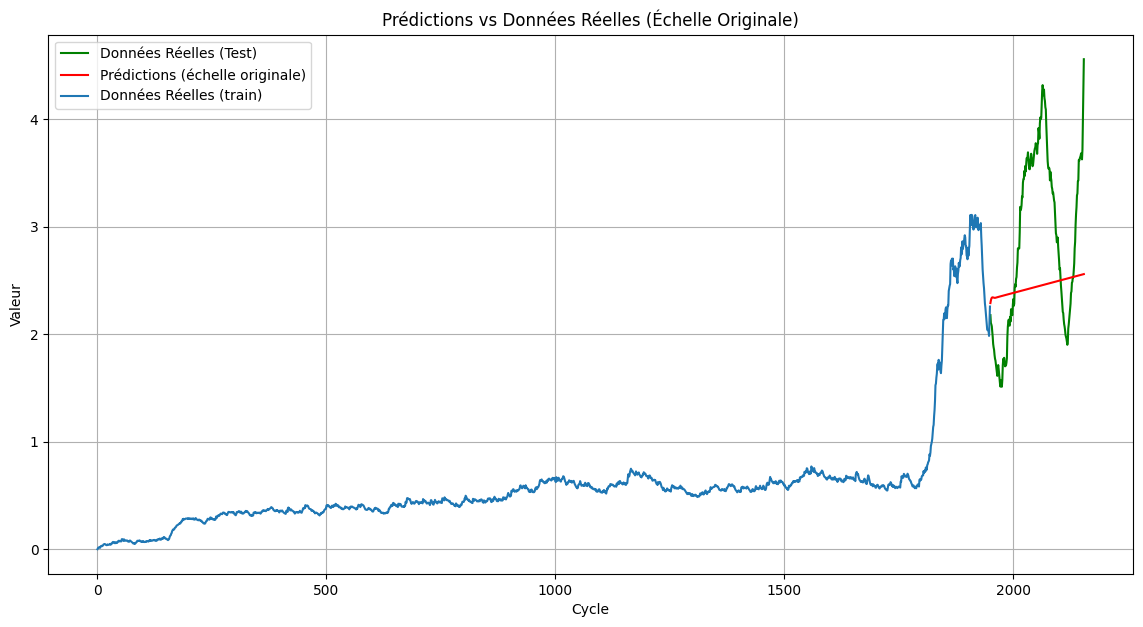

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(degredation_0_test.index, degredation_0_test, label='Données Réelles (Test)',color='g')
plt.plot(degredation_0_test.index, prediction_original, color='red', label='Prédictions (échelle originale)')
plt.plot(degredation_0_train.index, degredation_0_train, label='Données Réelles (train)')
plt.title('Prédictions vs Données Réelles (Échelle Originale)')
plt.xlabel('Cycle')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()


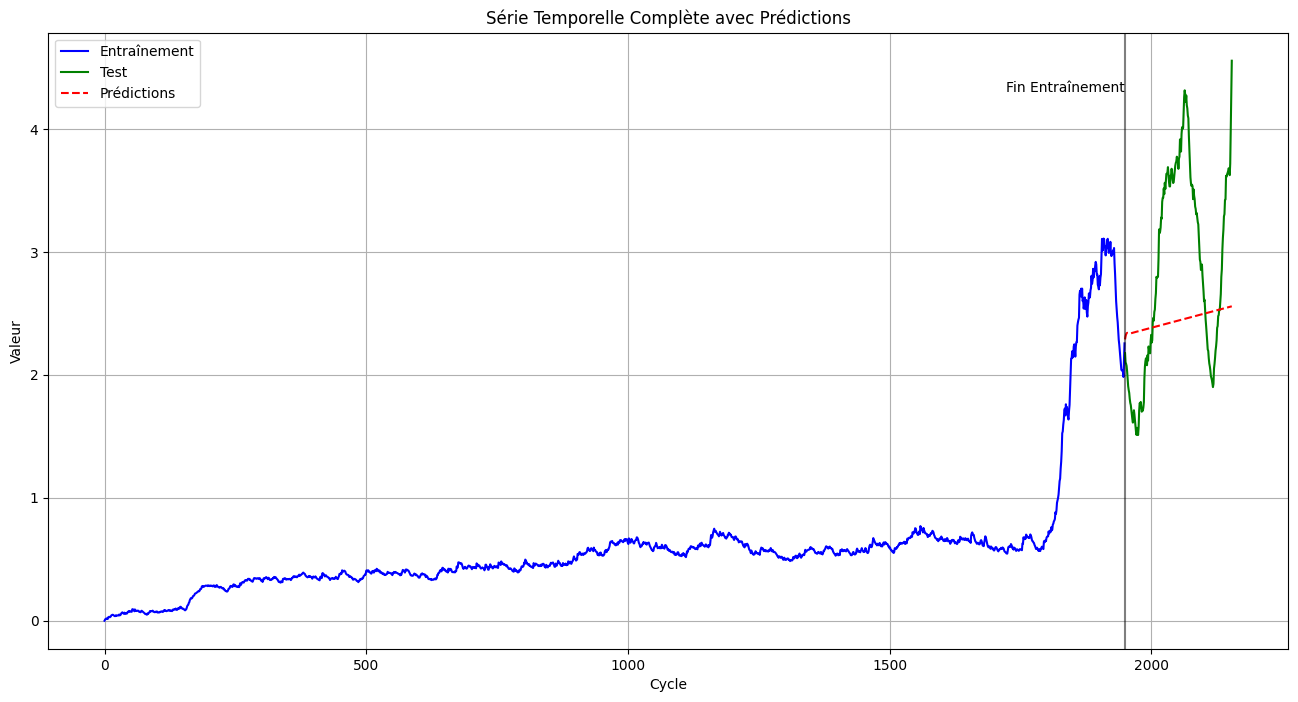

In [ ]:
# ----- VISUALISATION COMPLÈTE DE LA SÉRIE -----
plt.figure(figsize=(16, 8))

# Affichage des données d'entraînement
plt.plot(degredation_0_train.index, degredation_0_train, color='blue', label='Entraînement')

# Affichage des données de test
plt.plot(degredation_0_test.index, degredation_0_test, color='green', label='Test')

# Affichage des prédictions
plt.plot(degredation_0_test.index, prediction_original, color='red', linestyle='--', label='Prédictions')

# Ligne verticale séparant les ensembles d'entraînement et de test
plt.axvline(x=degredation_0_train.index[-1], color='black', linestyle='-', alpha=0.5)
plt.text(degredation_0_train.index[-1], plt.ylim()[1]*0.9, 'Fin Entraînement', ha='right')

plt.title('Série Temporelle Complète avec Prédictions')
plt.xlabel('Cycle')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()

# Appriche Deep

In [ ]:
def fenetre(df , w):
  return np.array([df[i:i+w] for i in range(len(df) - w + 1)])
w=4

X, y = fenetre(degredation_0['PC1'].values, w)[:, :-1], fenetre(degredation_0['PC1'].values, w)[:, -1]

y=y.reshape((len(y),1))

print("La taille de X",X.shape)
print("La taille de y",y.shape)

La taille de X (2153, 3)
La taille de y (2153, 1)


Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0412
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5013e-04
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7395e-04
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4104e-04
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1073e-04
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4374e-04
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5101e-04
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6978e-04
Epoch 9/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9569e-04
Epoch 10/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4379e-04
Epoch 11/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7966e-04
Epoch 12/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8865e-04
Epoch 13/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7078e-04
Epoch 14/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.

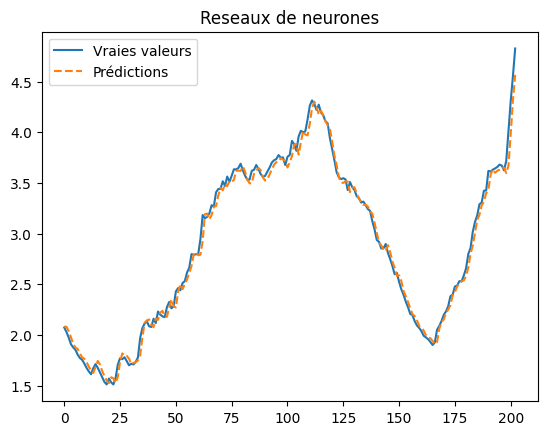

In [ ]:
# Diviser en données d'entraînement et de test
X_train,X_test,Y_train,Y_test=X[:1950,:],X[1950:,:],y[:1950],y[1950:]


# Construire un réseau de neurones simple
# Change input_shape to (X.shape[1],) to match the number of features in X
model = Sequential([
    layers.Dense(10, activation='relu', input_shape=(X.shape[1],)),  # Couche cachée
    layers.Dense(5, activation='relu'),
    layers.Dense(1)  # Sortie avec une seule valeur prédite
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1)

# Prédire sur les données de test
Y_pred = model.predict(X_test)


plt.title("Reseaux de neurones")
plt.plot(Y_test, label="Vraies valeurs")
plt.plot(Y_pred, label="Prédictions", linestyle="dashed")
plt.legend()
plt.show()

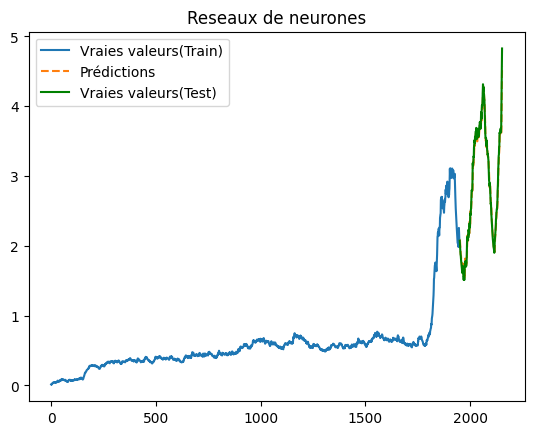

In [ ]:
#Trassage de l'alure complet:
#En utilisant les reseaux de neurones:
plt.title("Reseaux de neurones")
plt.plot(np.arange(1950),Y_train, label="Vraies valeurs(Train)")
# Adjust the x-axis data to match the size of Y_pred
plt.plot(np.arange(1950,len(y)), Y_pred, label="Prédictions", linestyle="dashed")
plt.plot(np.arange(1950,len(y)), Y_test, label="Vraies valeurs(Test)", color='g')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

In [ ]:
model_rnn = Sequential([
    SimpleRNN(64, input_shape=(None, 1)),  # 64 unités RNN, entrée de forme (timesteps, features)
    Dense(1)  # Couche de sortie pour la régression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm = Sequential([
    LSTM(64, input_shape=(None, 1)),  # 64 unités LSTM
    Dense(1)  # Couche de sortie
])

In [ ]:
model_gru = Sequential([
    GRU(64, input_shape=(None, 1)),  # 64 unités GRU
    Dense(1)  # Couche de sortie
])

In [ ]:
#Fase d'entrainement:
model_lstm.compile(optimizer='adam', loss='mse')
model_rnn.compile(optimizer='adam', loss='mse')
model_gru.compile(optimizer='adam', loss='mse')
# Entraînement du modèle
model_lstm.fit(X_train, Y_train, epochs=100, batch_size=32)
model_rnn.fit(X_train, Y_train, epochs=100, batch_size=32)
model_gru.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2692
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9554e-04
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4543e-04
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5515e-04
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1324e-04
Epoch 13/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2076e-04
Epoch 14/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 15/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [ ]:
Prd=[]
Prd.append(model_lstm.predict(X_test))
Prd.append(model_rnn.predict(X_test))
Prd.append(model_gru.predict(X_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


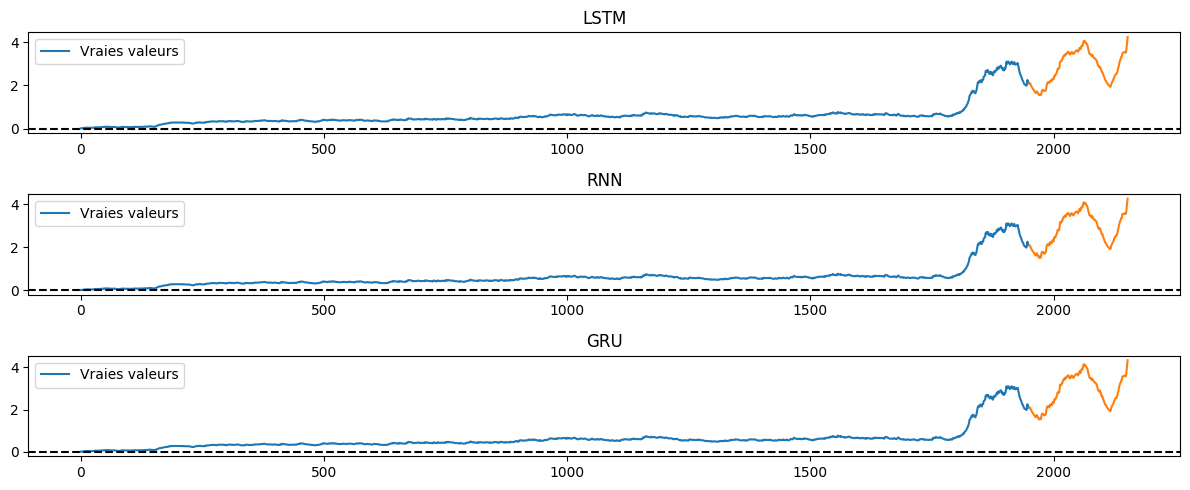

In [ ]:
# Tracé des résultats
plt.figure(figsize=(12, 5))
plt.subplot(3,1,1)
plt.plot(np.arange(1950),Y_train, label="Vraies valeurs")
# Adjust the x-axis data to match the size of Y_pred
plt.plot(np.arange(1950,len(y)), Prd[0])
plt.title("LSTM")
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.subplot(3,1,2)
plt.plot(np.arange(1950),Y_train, label="Vraies valeurs")
# Adjust the x-axis data to match the size of Y_pred
plt.plot(np.arange(1950,len(y)), Prd[1])
plt.title("RNN")
plt.axhline(0, color='black', linestyle='--')
plt.legend()


plt.subplot(3,1,3)
plt.plot(np.arange(1950),Y_train, label="Vraies valeurs")
# Adjust the x-axis data to match the size of Y_pred
plt.plot(np.arange(1950,len(y)), Prd[2])
plt.title("GRU")
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()